<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day2_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UNSUPERVISED METHODS** ##

- We have labelled data, but not enough to accurately train model.
- Existing labelled data low-quality.
- Time-consuming to get accurate labelled data.
- We have data, but no idea what correlations exist that we could model.

Let's look at three example methods:
- K-mean clustering (helps to group data points similar to each other and identifiying patterns).

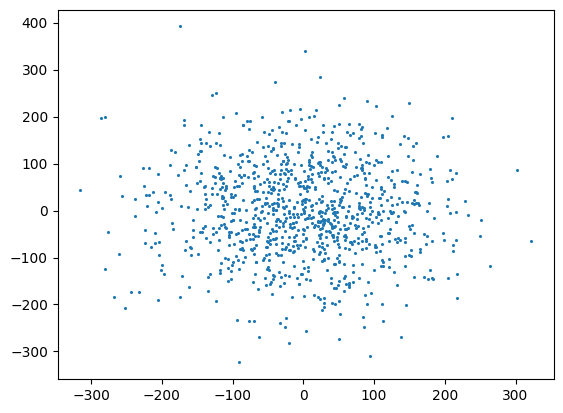

In [1]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_datasets
import matplotlib.pyplot as plt
import time

# Generates random data with four clusters containing 400 points each, with a standard deviation of 0.75.
data, cluster_id = skl_datasets.make_blobs(n_samples=1000, cluster_std=100,
                                           centers=4, random_state=1)

plt.scatter(data[:, 0], data[:,1], s=5, linewidth=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elapsed time: 0.04704427719116211 seconds


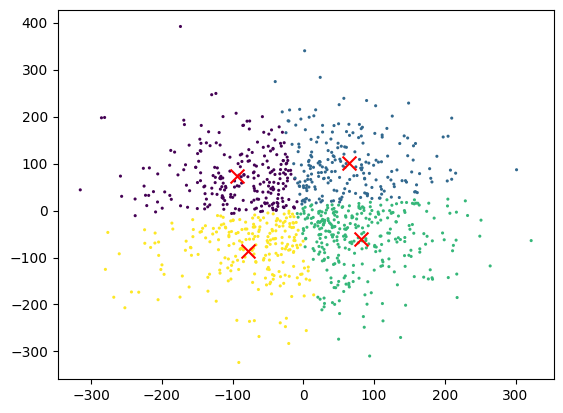

In [2]:
# Define our model
K_mean = skl_cluster.KMeans(n_clusters=4)

start = time.time()
K_mean.fit(data)
clusters = K_mean.predict(data)
end = time.time()

print("Elapsed time:",end-start,"seconds")

# Plot our K clusters and colour-coding them by their respective clusters
plt.scatter(data[:,0], data[:,1], s=5, linewidth=0, c=clusters)

# 	Show where the centre of the K clusters are.
for cluster_x, cluster_y in K_mean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

K means clustering has some limitations. We can overcome this with **spectral clustering**.

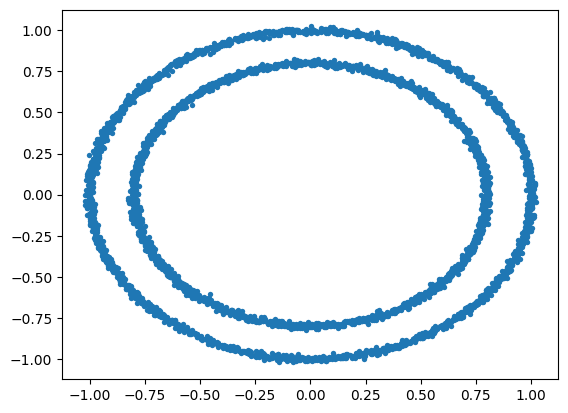

In [3]:
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(
    n_samples=4000, noise=0.01, random_state=0)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0)

Unsupervised learning helps us to gain insights about unknown data and figure out which labels can we use for supervised training. Spectral clustering is more complicated as it introduces more dimensionality to a dataset, so it is more computationally expensive.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Elapsed time: 45.90836262702942 seconds


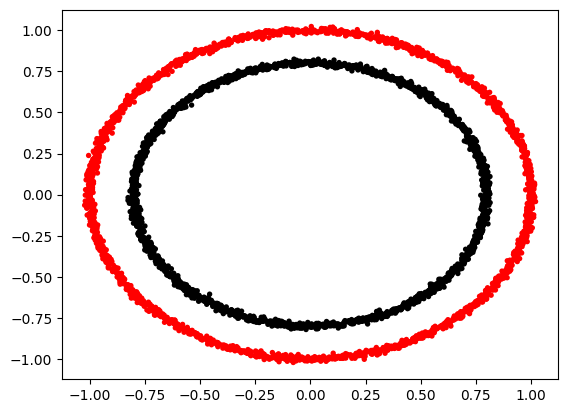

In [4]:
# Define model
model = skl_cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors",
                                       assign_labels="kmeans")

# Fit model to data
start = time.time()
labels = model.fit_predict(circles)
end = time.time()

print("Elapsed time:",end-start,"seconds")

plt.scatter(circles[:,0], circles[:,1], s=15,
            linewidth=0, c=labels, cmap='flag')

## **DIMENSIONAL REDUCTION**

In [7]:
from sklearn import datasets

# load in dataset as dataframe and return X and Y
features, labels = datasets.load_digits(return_X_y=True, as_frame=True)

print(features.shape, labels.shape)
print(labels)
features.head()

# very complex dataset (64-dimensional dataset)

(1797, 64) (1797,)
0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
